<a href="https://colab.research.google.com/github/Akkki28/Background-Stylizer/blob/main/NSTwithSemanticSegmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub

In [2]:
def load_and_preprocess_image(image, image_size=(256, 256), preserve_aspect_ratio=True):
    """Loads and preprocesses an image from an array."""
    img = image.astype(np.float32) / 255.0
    img = img[np.newaxis, ...]

    img = crop_center(img)

    if preserve_aspect_ratio:
        img = tf.image.resize_with_pad(img, image_size[0], image_size[1])
    else:
        img = tf.image.resize(img, image_size)

    return img

In [3]:
def crop_center(image):
  """Returns a cropped square image."""
  shape = image.shape
  new_shape = min(shape[1], shape[2])
  offset_y = max(shape[1] - shape[2], 0) // 2
  offset_x = max(shape[2] - shape[1], 0) // 2
  image = tf.image.crop_to_bounding_box(
      image, offset_y, offset_x, new_shape, new_shape)
  return image

In [4]:
import cv2
content=cv2.imread('/content/17kohli1.jpg')
style=cv2.imread('/content/van gogh.jpeg')

In [5]:
content_img=load_and_preprocess_image(image=content)
style_img=load_and_preprocess_image(image=style)

In [6]:
hub_handle = 'https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2'
hub_module = hub.load(hub_handle)

In [7]:
outputs = hub_module(content_img, style_img)
stylized_image = outputs[0]

In [8]:
def save_image(image, filename):
    """Saves a TensorFlow image to a file."""
    image = tf.squeeze(image, axis=0)
    image = tf.image.convert_image_dtype(image, dtype=tf.uint8)
    if filename.endswith('.jpg') or filename.endswith('.jpeg'):
        encoded_image = tf.io.encode_jpeg(image)
    elif filename.endswith('.png'):
        encoded_image = tf.io.encode_png(image)
    else:
        raise ValueError("Filename extension not supported. Use .jpg, .jpeg or .png")
    tf.io.write_file(filename, encoded_image)

In [9]:
save_image(stylized_image, 'stylized_image.jpg')

In [10]:
stylized=cv2.imread('/content/stylized_image.jpg')

In [11]:
from PIL import Image
image_path = '/content/17kohli1.jpg'
image = Image.open(image_path)

In [12]:
resized_image = image.resize((256,256))

In [13]:
resized_image.save("resized_image.jpg")

In [14]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 757.2/757.2 kB 10.3 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-man

In [15]:
overlay_img=cv2.imread('/content/resized_image.jpg')

In [16]:
from ultralytics import YOLO
model = YOLO("yolov8m-seg.pt")
results = model.predict(overlay_img)

100%|██████████| 52.4M/52.4M [00:00<00:00, 71.4MB/s]



0: 640x640 2 persons, 5238.7ms
Speed: 17.5ms preprocess, 5238.7ms inference, 4365.4ms postprocess per image at shape (1, 3, 640, 640)


In [17]:
result = results[0]
masks = result.masks
len(masks)

2

In [18]:
mask1 = masks[0]

In [19]:
polygon = mask1.xy[0]

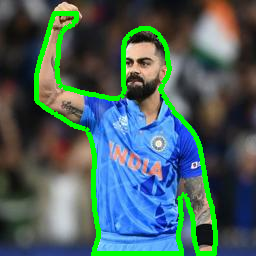

In [20]:
from PIL import ImageDraw

img = Image.open('/content/resized_image.jpg')
draw = ImageDraw.Draw(img)
draw.polygon(polygon,outline=(0,255,0), width=5)
img

In [21]:
masky = np.zeros_like(overlay_img[:, :, 0])
cv2.fillPoly(masky, [polygon.astype(np.int32)], 255)

# Extract the segmented part using the mask
overlay = cv2.bitwise_and(overlay_img, overlay_img, mask=masky)

# Convert the BGR overlay image to RGBA
b, g, r = cv2.split(overlay)
alpha = masky  # The mask is used as the alpha channel
overlay_rgba = cv2.merge((r, g, b, alpha))

# Save the overlay as a PNG with transparency
cv2.imwrite('overlay2.png', overlay_rgba)

True

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)
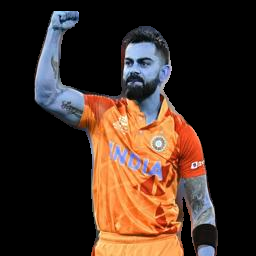

In [22]:
overlay

In [23]:
cv2.imwrite('overlay.png', overlay)

True

In [24]:
from PIL import Image

# Open the two images
background = Image.open('/content/stylized_image.jpg').convert('RGBA')
overlay_image = Image.open('/content/overlay2.png').convert('RGBA')

# Ensure both images are the same size
if background.size != overlay_image.size:
    raise ValueError("The images must have the same dimensions")

# Composite the images
combined = Image.alpha_composite(background, overlay_image)

# Save the result
combined.save('combined4.png')

In [25]:
final=cv2.imread('/content/combined4.png')

array([[[ 53,  52,  72],
        [ 62,  66,  85],
        [ 73,  81,  98],
        ...,
        [ 63,  98, 138],
        [ 71, 102, 141],
        [ 62,  93, 132]],

       [[ 56,  57,  77],
        [ 63,  67,  85],
        [ 75,  83, 100],
        ...,
        [ 71, 104, 143],
        [ 80, 112, 148],
        [ 77, 109, 145]],

       [[ 47,  51,  69],
        [ 53,  60,  77],
        [ 74,  82,  99],
        ...,
        [ 54,  89, 122],
        [ 66,  98, 133],
        [ 70, 100, 135]],

       ...,

       [[ 50,  59,  97],
        [ 38,  47,  84],
        [ 44,  53,  86],
        ...,
        [ 25,  48,  80],
        [ 34,  53,  86],
        [ 30,  49,  82]],

       [[ 54,  63, 106],
        [ 40,  48,  88],
        [ 53,  62,  96],
        ...,
        [ 31,  53,  89],
        [ 39,  58,  95],
        [ 36,  55,  93]],

       [[ 49,  58, 102],
        [ 35,  42,  85],
        [ 51,  59,  96],
        ...,
        [ 29,  51,  87],
        [ 31,  51,  92],
        [ 27,  47,  88]]], dtype=uint8)
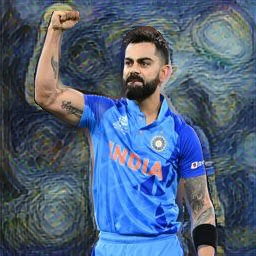

In [26]:
final